In [1]:
from glob import glob
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import re


In [2]:
# load all en ja zh json file paths
en_story_path = 'GAMEDATA/ArknightsData/en-US/gamedata/story'
ja_story_path = 'GAMEDATA/ArknightsData/ja-JP/gamedata/story'
zh_story_path = 'GAMEDATA/ArknightsData/zh-CN/gamedata/story'

skip_count = 0
en_story_files, ja_story_files, zh_story_files = [], [], []
for zh_file in tqdm(glob(f'{zh_story_path}/**/*.txt', recursive=True)):
    en_file = zh_file.replace('zh-CN', 'en-US')
    ja_file = zh_file.replace('zh-CN', 'ja-JP')
    if not os.path.exists(en_file) or not os.path.exists(ja_file):
        skip_count += 1
        continue
    en_story_files.append(en_file)
    ja_story_files.append(ja_file)
    zh_story_files.append(zh_file)

print(f'Skip {skip_count} files, {len(en_story_files)} files left.')

/tmp/ipykernel_5155/3468034558.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for zh_file in tqdm(glob(f'{zh_story_path}/**/*.txt', recursive=True)):


  0%|          | 0/1387 [00:00<?, ?it/s]

Skip 195 files, 1192 files left.


In [3]:
# load all en ja zh txt file into df
# empty line should be removed
# should remove lines like: [some word]
regex = re.compile(r'^(\[[^\]]+\][\n]*)$')

df = pd.DataFrame(columns=['en', 'ja', 'zh'])
for en_file, ja_file, zh_file in tqdm(
    zip(en_story_files, ja_story_files, zh_story_files), total=len(en_story_files)
):
    en_story_text, ja_story_text, zh_story_text = [], [], []
    with open(en_file, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            if line == '' or line == '\n':
                continue
            elif regex.match(line):
                continue
            line = line.strip('\n')
            en_story_text.append(line)
    with open(ja_file, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            if line == '' or line == '\n':
                continue
            elif regex.match(line):
                continue
            line = line.strip('\n')
            ja_story_text.append(line)
    with open(zh_file, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            if line == '' or line == '\n':
                continue
            elif regex.match(line):
                continue
            line = line.strip('\n')
            zh_story_text.append(line)

    df =  pd.concat([df,
        pd.DataFrame({
            'en': en_story_text,
            'ja': ja_story_text,
            'zh': zh_story_text})
                     ], ignore_index=True)
df

/tmp/ipykernel_5155/1401039943.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for en_file, ja_file, zh_file in tqdm(


  0%|          | 0/1192 [00:00<?, ?it/s]

,en,ja,zh
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...
...,...,...,...
72024,"[name=""Dobermann""] Preparation is always the...","[name=""ドーベルマン""] 作戦前の周到な準備は、常に勝利への第一歩となる。","[name=""杜宾""] 做好战前的准备永远都是胜利的第一步。"
72025,"[name=""Provence""] Now then, I will be offici...","[name=""プロヴァンス""] じゃあ、危機契約————作戦コード「荒廃」に関して、正式...","[name=""普罗旺斯""] 那么，危机合约————代号荒芜行动，正式转交给博士。"
72026,"[name=""Provence""] Subsequently, PRTS will co...","[name=""プロヴァンス""] ここからはPRTSが関連資料の整理をしてくれるよ。もし何...","[name=""普罗旺斯""] PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在..."
72027,"[name=""Provence""] The operation has official...","[name=""プロヴァンス""] じゃあ始めよう。みんなどうか無事でね。","[name=""普罗旺斯""] 行动正式开始，祝大家一切顺利。"


In [4]:
# drop duplicate
df = df.drop_duplicates(subset=['en', 'ja', 'zh'], keep='first')
df

,en,ja,zh
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...
...,...,...,...
72024,"[name=""Dobermann""] Preparation is always the...","[name=""ドーベルマン""] 作戦前の周到な準備は、常に勝利への第一歩となる。","[name=""杜宾""] 做好战前的准备永远都是胜利的第一步。"
72025,"[name=""Provence""] Now then, I will be offici...","[name=""プロヴァンス""] じゃあ、危機契約————作戦コード「荒廃」に関して、正式...","[name=""普罗旺斯""] 那么，危机合约————代号荒芜行动，正式转交给博士。"
72026,"[name=""Provence""] Subsequently, PRTS will co...","[name=""プロヴァンス""] ここからはPRTSが関連資料の整理をしてくれるよ。もし何...","[name=""普罗旺斯""] PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在..."
72027,"[name=""Provence""] The operation has official...","[name=""プロヴァンス""] じゃあ始めよう。みんなどうか無事でね。","[name=""普罗旺斯""] 行动正式开始，祝大家一切顺利。"


In [5]:
# remove name tag of dialog
# which is like: [...]   dialog, just keep dialog
regex = re.compile(r'^(\[[^\]]+\][ ]*)')
df['en'] = df['en'].apply(lambda x: regex.sub('', x))
df['ja'] = df['ja'].apply(lambda x: regex.sub('', x))
df['zh'] = df['zh'].apply(lambda x: regex.sub('', x))
df

/tmp/ipykernel_5155/3367292161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en'] = df['en'].apply(lambda x: regex.sub('', x))
/tmp/ipykernel_5155/3367292161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ja'] = df['ja'].apply(lambda x: regex.sub('', x))
/tmp/ipykernel_5155/3367292161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,en,ja,zh
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...
...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。


In [6]:
# remove row with only punctuation
df = df[~df['en'].str.match(r'^[^\w\s]+$')]
df = df[~df['ja'].str.match(r'^[^\w\s]+$')]
df = df[~df['zh'].str.match(r'^[^\w\s]+$')]
df

,en,ja,zh
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...
...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。


In [7]:
# remove lines with only numbers
df = df[~df['en'].str.match(r'^\d+$')]
df = df[~df['ja'].str.match(r'^\d+$')]
df = df[~df['zh'].str.match(r'^\d+$')]
df

,en,ja,zh
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...
...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。


In [8]:
# remove lines that tokens is more than 256 or less than 1
from transformers import MT5TokenizerFast
tokenizer = MT5TokenizerFast.from_pretrained('google/mt5-small')

df['en_len'] = df['en'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ja_len'] = df['ja'].apply(lambda x: len(tokenizer.tokenize(x)))
df['zh_len'] = df['zh'].apply(lambda x: len(tokenizer.tokenize(x)))
df

/home/toshihiko/anaconda3/envs/pytorch201/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


,en,ja,zh,en_len,ja_len,zh_len
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。,19,22,19
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人,31,30,25
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。,37,43,32
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...,71,51,53
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...,58,45,46
...,...,...,...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。,12,16,11
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。,27,24,20
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。,29,26,22
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。,16,11,10


In [9]:
df = df[df['en_len'] <= 256]
df = df[df['ja_len'] <= 256]
df = df[df['zh_len'] <= 256]
df = df[df['en_len'] >= 1]
df = df[df['ja_len'] >= 1]
df = df[df['zh_len'] >= 1]
df

,en,ja,zh,en_len,ja_len,zh_len
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。,19,22,19
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人,31,30,25
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。,37,43,32
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...,71,51,53
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...,58,45,46
...,...,...,...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。,12,16,11
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。,27,24,20
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。,29,26,22
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。,16,11,10


In [10]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/LaBSE').cuda()


_batch, _scores = [], []
_bs = 64
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    inputs = [row.en, row.ja, row.zh]
    _batch.extend(inputs)
    if (i+1) % _bs == 0 or i == df.shape[0]-1:
        embeddings = model.encode(_batch)
        # calculate score between each pair
        for j in range(embeddings.shape[0]//3):
            _scores.append(np.average([
                np.matmul(embeddings[j*3], embeddings[j*3+1].T),
                np.matmul(embeddings[j*3], embeddings[j*3+2].T),
                np.matmul(embeddings[j*3+1], embeddings[j*3+2].T)
            ]))
        _batch = []
df = df.assign(score=_scores)
df

/tmp/ipykernel_5155/115076287.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/67650 [00:00<?, ?it/s]

,en,ja,zh,en_len,ja_len,zh_len,score
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。,19,22,19,0.704038
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人,31,30,25,0.692298
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。,37,43,32,0.830798
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...,71,51,53,0.781219
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...,58,45,46,0.773155
...,...,...,...,...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。,12,16,11,0.869367
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。,27,24,20,0.668203
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。,29,26,22,0.753541
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。,16,11,10,0.645475


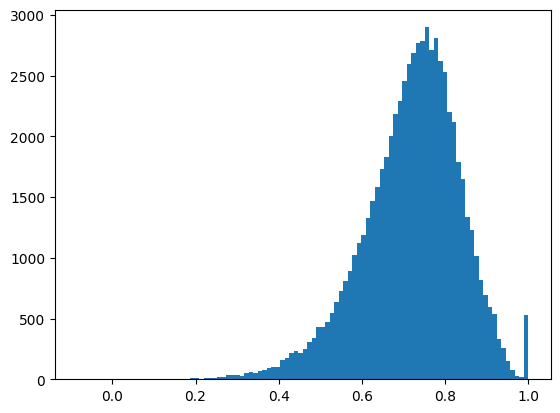

In [11]:
# statistics score using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['score'], bins=100)
plt.show()

In [12]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
df = df[df['score'] >= 0.6]
df = df[df['score'] <= 0.99]
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。,19,22,19,0.704038
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人,31,30,25,0.692298
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。,37,43,32,0.830798
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...,71,51,53,0.781219
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...,58,45,46,0.773155
...,...,...,...,...,...,...,...
72024,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。,12,16,11,0.869367
72025,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。,27,24,20,0.668203
72026,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。,29,26,22,0.753541
72027,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。,16,11,10,0.645475


In [13]:
# drop len and score column
df = df.drop(columns=['en_len', 'ja_len', 'zh_len', 'score'])
# save to parquet
df.to_parquet('parquet/ArknightsStory.parquet', index=False)

In [14]:
# load parquet
df = pd.read_parquet('parquet/ArknightsStory.parquet')
df

,en,ja,zh
0,Operator Thorns accompanies Rhodes Island to S...,ロドス一行と共にシエスタに来たソーンズは、一日の休日を謳歌する。,干员棘刺随罗德岛来到汐斯塔，度过休闲一日。
1,"When the sun started to set, the Ægirians, far...",日が沈みゆく中、エーギル人は異郷のビーチに佇んでいた。程なくして、未知の敵と遭遇する——,而当日落临近，离乡的阿戈尔人在沙滩旁，偶然遭遇了未知的敌人
2,Capone betrayed Gambino. Mostima rescued Bison...,カポネはガンビーノを裏切った。モスティマはバイソンを救い出した。そして鼠王は本当の姿を見せた...,卡彭背叛了甘比诺。莫斯提马救下了拜松。鼠王露出了真面目。龙门晚风轻拂。
3,"Bison and Mostima, while wandering around seem...",悠々と街を歩くバイソンとモスティマは、飴屋の前を通りかかったところでマフィアに狙われてしまう...,优哉游哉的拜松与莫斯提马路过了一家糖果店，却也在此时被黑手党盯上。为了顺利摆脱追踪，拜松跳上...
4,"Yith is being watched by a certain Liberi, and...",イースはあるリーベリに監視されており、そしてモスティマは以前から鼠王の存在を知っていた。 再...,伊斯遭到了某位黎博利的监视，而莫斯提马也早已知晓鼠王存在。重新汇合的企鹅物流众人得到了大帝的...
...,...,...,...
57186,Preparation is always the first step of victory.,作戦前の周到な準備は、常に勝利への第一歩となる。,做好战前的准备永远都是胜利的第一步。
57187,"Now then, I will be officially transferring th...",じゃあ、危機契約————作戦コード「荒廃」に関して、正式にドクターに委任するよ。,那么，危机合约————代号荒芜行动，正式转交给博士。
57188,"Subsequently, PRTS will collate all the releva...",ここからはPRTSが関連資料の整理をしてくれるよ。もし何か分からないことがあったら管理画面で...,PRTS会做好后续的相关资料整理工作，如果还有疑问博士可以在管理界面进行再确认。
57189,The operation has officially begun. I wish eve...,じゃあ始めよう。みんなどうか無事でね。,行动正式开始，祝大家一切顺利。
